## Logistic regression


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [8]:
s = df.isna().sum()

In [11]:
## check value count for species 

In [12]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: title={'center': 'countplot for species'}, xlabel='species'>

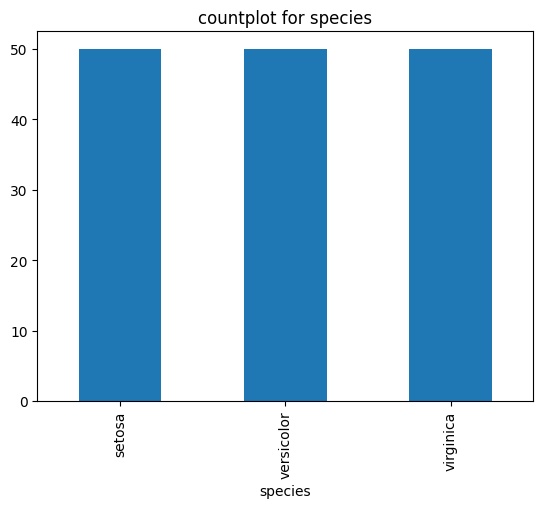

In [13]:
df['species'].value_counts().plot(kind='bar',title='countplot for species')

In [14]:
## separate x and y 

In [15]:
x = df.drop(columns=['species'])
y = df[['species']]

In [16]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [18]:
## label encode the species 

In [19]:
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [20]:
le = LabelEncoder()
y['species']=le.fit_transform(y['species'])

In [21]:
y['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [22]:
## preprocessing for x 

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [24]:
## numerical pipeline

In [25]:
num_pipe = Pipeline(steps = [('impute',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

In [27]:
x_pre = num_pipe.fit_transform(x)
x_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [28]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [29]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [30]:
## split train test

In [32]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.33,random_state=42)

In [33]:
xtrain.shape

(100, 4)

In [34]:
xtest.shape

(50, 4)

In [35]:
## building logistic regression model

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [37]:
# accuracy in train 

In [38]:
model.score(xtrain,ytrain)

0.96

In [39]:
# accuracy in testing
model.score(xtest,ytest)

0.98

In [43]:
#predicting test data 
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [46]:
ypred_tr[0:5]

array([1, 2, 1, 0, 2])

In [47]:
ytrain.head()

,species
96,1
105,2
66,1
0,0
122,2


In [48]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

In [49]:
ytest.head()

,species
73,1
18,0
118,2
78,1
76,1


In [51]:
## ploting the confusion matrix for test data

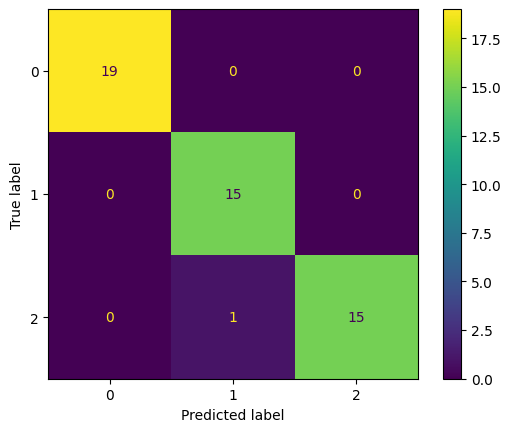

In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()


In [55]:
ytest.value_counts().unique

<bound method Series.unique of species
0          19
2          16
1          15
Name: count, dtype: int64>

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [58]:
## original labels with le.inverse_transform

In [59]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [60]:
ypred_tr_lb 

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor'

In [61]:
ypred_ts_lb 

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)